<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

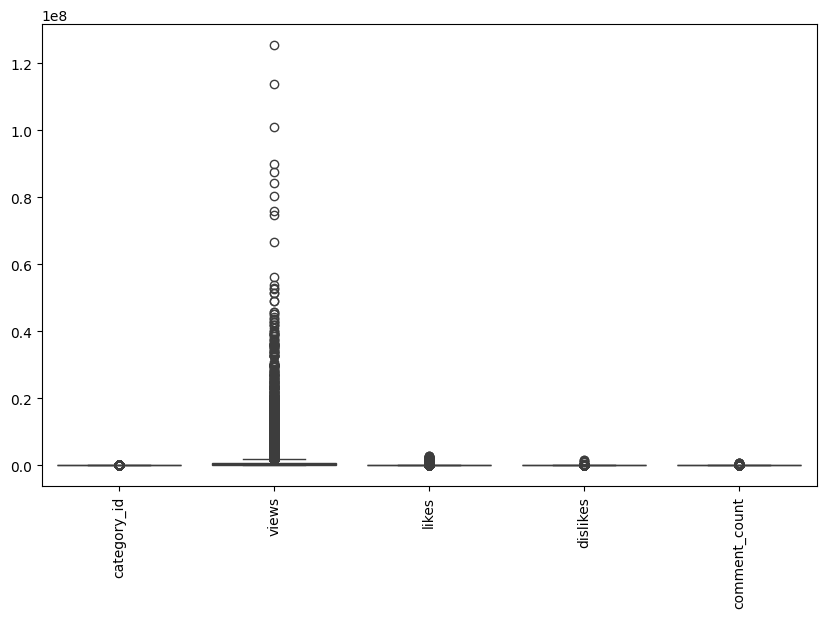

Outlier detection and handling complete. Cleaned data saved to: C:\Users\vishw\Downloads\archive (4)\INvideos_cleaned.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

# Load your dataset
file_path = r'C:\Users\vishw\Downloads\archive (4)\INvideos.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())

# Visualize data with box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

# Z-score method to identify outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include='number')))
df_outliers_z = df[(z_scores > 3).any(axis=1)]

# IQR method to identify outliers
numeric_cols = df.select_dtypes(include='number').columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_outliers_iqr = df[((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Isolation Forest method to identify outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = iso_forest.fit_predict(df.select_dtypes(include='number'))
df_outliers_iso = df[df['outlier'] == -1]

# Handle outliers (example: remove them)
df_cleaned = df[df['outlier'] == 1]

# Save the cleaned dataset
cleaned_file_path = r'C:\Users\vishw\Downloads\archive (4)\INvideos_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print("Outlier detection and handling complete. Cleaned data saved to:", cleaned_file_path)


